<a href="https://colab.research.google.com/github/thyeaditungson29/mystudy_ADL2022/blob/main/UTS_ADL_Thyeadi_Tungson(1st_version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTS Applied Deep Learning**


* Project: XNet: A convolutional neural network (CNN) implementation for medical X-Ray image segmentation suitable for small datasets

* Paper: https://paperswithcode.com/paper/xnet-a-convolutional-neural-network-cnn

* XNet Model: https://github.com/JosephPB/XNet


*   Data: https://www.kaggle.com/datasets/nikhilpandey360/chest-xray-masks-and-labels



# **PART 1**
*(Menggunakan Simulasi Dari CODE Github Sumber)*
# **Download Data dan Model**

In [1]:
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1Wel_XsyE7HcEq0TkZWI61GABO4jOtj9C',
                                    dest_path='./dataset.hdf5')
gdd.download_file_from_google_drive(file_id='1cePD5E-T9mr5W0xPGuzEnUt8Glpvn23U',
                                    dest_path='./model.h5')

# **Loading Library**

In [2]:
import os, sys
import numpy as np
import h5py
import matplotlib
import cv2
from matplotlib import image
import matplotlib.pyplot as plt

#import Keras sub-modules
from keras.models import Model #functional API for Keras (best for greater flexibility)
from keras.layers import Input, Concatenate, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense #'main' layers
from keras.layers import BatchNormalization, Dropout #regulartisation layers
from keras.layers import Activation
from keras.optimizers import * #import all optimisers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger #callbacks for model performance analysis
from keras.metrics import categorical_accuracy #metrics for model performance
from keras import backend as K #gives backend functionality
from keras import losses #imports pre-defined loss functions
from keras.models import load_model #allows pre-trained models to be called back

# **Loading Dataset**

In [3]:
hdf5_path = "./dataset.hdf5" ## this is our h5 file containing training and testing data
dataset = h5py.File(hdf5_path , 'r')

classes = 3

test_images = dataset['test_img'][:]
no_images, height, width, channels = test_images.shape

test_labels =dataset['test_label'][:].reshape(-1,height*width, classes )
print('Dimensi dari Test Image',test_images.shape)
print('Dimensi dari Test Label',test_labels.shape)
dataset.close()

Dimensi dari Test Image (22, 200, 200, 1)
Dimensi dari Test Label (22, 40000, 3)


# **Loading Model**

In [4]:
model = load_model("./model.h5")

In [5]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 200, 200, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 200, 200, 64  256        ['conv2d_1[0][0]']               
 rmalization)                   )                                                           

# **Menampilkan Image dan Prediksi dari Model**

*Data Image dari Dataset yang disediakan di GitHub*

Berikut adalah 7 sample dari data test yang akan digunakan: 


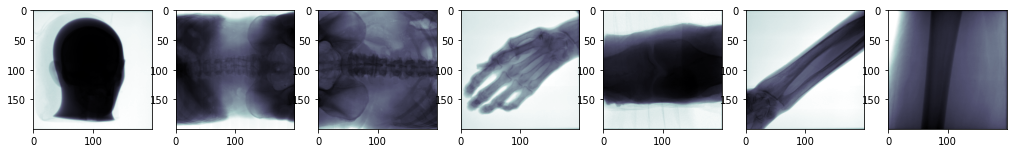

In [6]:
# Menampilkan 7 gambar dari data test
fig = plt.figure(figsize=(20, 20))
print("Berikut adalah 7 sample dari data test yang akan digunakan: ")
for i in range(7):
  fig.add_subplot(3, 8, i+1)
  plt.imshow(test_images[i].reshape(200,200), cmap='bone')

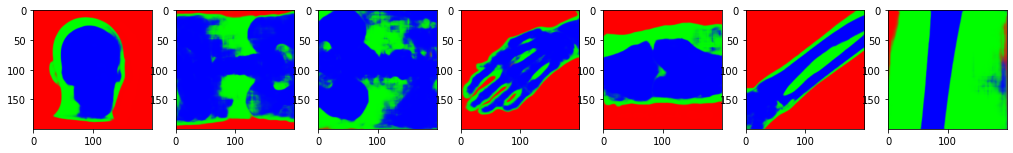

In [7]:
# Menampilkan 7 gambar dari prediksi
testing_image=np.empty([7,200,200,1])
for i in range(7):
    testing_image[i]=test_images[i]
testing_image=testing_image.reshape((7,200,200,1))
  
prediction2 = model.predict(testing_image)
prediction2 = prediction2.reshape((7,200,200,3))

fig = plt.figure(figsize=(20, 20))
for i in range(7):
  fig.add_subplot(3, 8, i+1)
  plt.imshow(prediction2[i])

In [8]:
test_index = 3

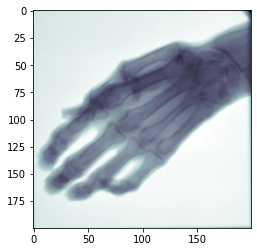

In [77]:
testing_image = test_images[test_index]

#as we are only running one image, we must reshape to shape (batch, height, width, channels)
plt.imshow(test_images[test_index].reshape(200,200), cmap='bone')
testing_image = testing_image.reshape((1,200,200,1))

In [10]:
prediction = model.predict(testing_image)

#the prediction is a flattened array and so must be reshaped.
#there are 3 channels as we are actually outputting the probability map over all 3 classes.
prediction = prediction.reshape((200,200,3))

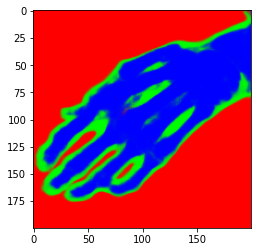

In [11]:
plt.imshow(prediction)

*Data Image dari Dataset dari Luar, diambil dari Kaggle*

In [12]:
!pip install kaggle

In [13]:
#Upload file json kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thyeaditungson29","key":"dba4278816cf1a21a33350216eb24964"}'}

In [14]:
!mkdir -p ~/.kaggle && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [15]:
!kaggle datasets download -d ibombonato/xray-body-images-in-png-unifesp-competion

 97% 194M/200M [00:02<00:00, 81.0MB/s]
100% 200M/200M [00:02<00:00, 83.5MB/s]


In [16]:
!unzip xray-body-images-in-png-unifesp-competion.zip

Archive:  xray-body-images-in-png-unifesp-competion.zip
  inflating: image_png.png           
  inflating: images/test/1.2.826.0.1.3680043.8.498.10001001190452685542754353271306894106-c.png  
  inflating: images/test/1.2.826.0.1.3680043.8.498.10022667601042710442884728915610557590-c.png  
  inflating: images/test/1.2.826.0.1.3680043.8.498.10024395388921105474336784272390605225-c.png  
  inflating: images/test/1.2.826.0.1.3680043.8.498.10026689165626095651568657562992631805-c.png  
  inflating: images/test/1.2.826.0.1.3680043.8.498.10035936364561920980924160549027696414-c.png  
  inflating: images/test/1.2.826.0.1.3680043.8.498.10048151016194111821946577128316853508-c.png  
  inflating: images/test/1.2.826.0.1.3680043.8.498.10050288866897098549171724525519515056-c.png  
  inflating: images/test/1.2.826.0.1.3680043.8.498.10058159876923426607443905471214229386-c.png  
  inflating: images/test/1.2.826.0.1.3680043.8.498.10080393723513249121106839017290899983-c.png  
  inflating: images/test

In [17]:
!pip install Pillow

In [18]:
import PIL
from PIL import Image
# Cek informasi image dari Kaggle

Gambar = Image.open('/content/images/train/1.2.826.0.1.3680043.8.498.46422711165523680233963544478901961208-c.png')
print(Gambar.format)
print(Gambar.mode)
print(Gambar.size)
Gambar.show()

PNG
L
(512, 420)


In [19]:
gs_Gambar = Gambar.resize((200,200))
# save in jpeg format
gs_Gambar.save('Contoh_resize.png')
# load the Gambar again and show it
Gambar2 = Image.open('Contoh_resize.png')
# show the image
print(Gambar2.format)
print(Gambar2.mode)
print(Gambar2.size)
Gambar2.show()

PNG
L
(200, 200)


***Menampilkan Gambar dan Prediksi untuk 1 Image Test***

float32
(200, 200)


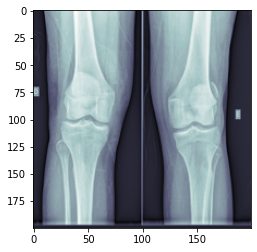

In [20]:
# load image as pixel array
data2 = image.imread('Contoh_resize.png')
# summarize shape of the pixel array
print(data2.dtype)
print(data2.shape)
# display the array of pixels as an image
plt.imshow(data2, cmap='bone')
plt.show()

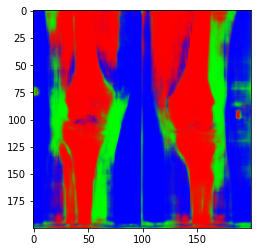

In [21]:
testing_image = data2.reshape((1,200,200,1))
prediction = model.predict(testing_image)

#the prediction is a flattened array and so must be reshaped.
#there are 3 channels as we are actually outputting the probability map over all 3 classes.
prediction = prediction.reshape((200,200,3))
plt.imshow(prediction)

In [22]:
#setting the path to the directory containing the pics
image_path1 = '/content/images/test'
image_path2 = '/content/images/train'

In [23]:
name1 = os.listdir(image_path1)
name2 = os.listdir(image_path2)

***Menampilkan Gambar dan Prediksi untuk beberapa Image Test***

In [24]:
#Convert image menjadi input array
ukuran_batch = 5
input1_arr=[]
for img in name1[0:ukuran_batch]:
  image = tf.keras.preprocessing.image.load_img(path=os.path.join(image_path1,img),color_mode="grayscale",target_size=(200,200))
  pic = tf.keras.preprocessing.image.img_to_array(image)
  input1_arr.append(pic.reshape((1,200,200,1)))

input2_arr=[]
for img in name2[0:ukuran_batch]:
  image = tf.keras.preprocessing.image.load_img(path=os.path.join(image_path2,img),color_mode="grayscale",target_size=(200,200))
  pic = tf.keras.preprocessing.image.img_to_array(image)
  input2_arr.append(pic.reshape((1,200,200,1)))

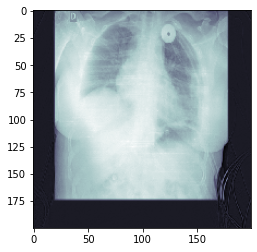

In [25]:
#Menampilkan salah satu image input dari test
input1_arr = np.asarray(input1_arr)
input1_arr = input1_arr.reshape(ukuran_batch,200,200,1)
plt.imshow(input1_arr[0].reshape(200,200), cmap="bone")
plt.show()

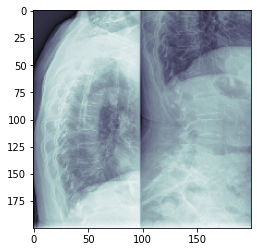

In [26]:
#Menampilkan salah satu image input dari test
input2_arr = np.asarray(input2_arr)
input2_arr = input2_arr.reshape(ukuran_batch,200,200,1)
plt.imshow(input2_arr[0].reshape(200,200), cmap="bone")
plt.show()

In [27]:
#Prediksi image dalam batch
predictions1 = model.predict(input1_arr)
predictions2 = model.predict(input2_arr)

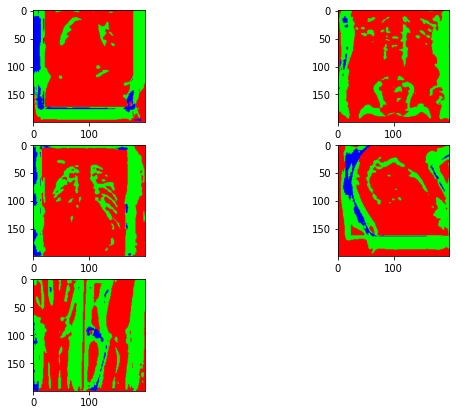

In [28]:
predictions1 = predictions1.reshape((ukuran_batch,200,200,3))

fig = plt.figure(figsize=(10, 7))
for i in range(ukuran_batch):
   fig.add_subplot(3, 2, i+1)
   plt.imshow(predictions1[i])

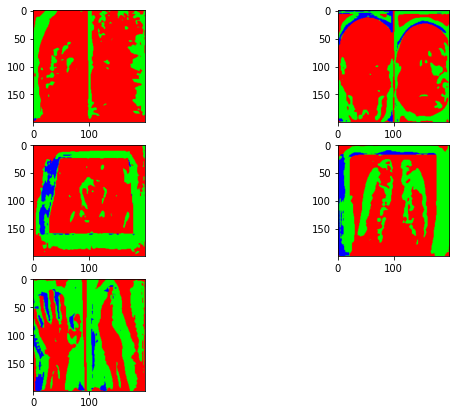

In [29]:
predictions2 = predictions2.reshape((ukuran_batch,200,200,3))

fig = plt.figure(figsize=(10, 7))
for i in range(ukuran_batch):
   fig.add_subplot(3, 2, i+1)
   plt.imshow(predictions2[i])

# **PART 2**
*(Menggunakan XNet model dari Github Sumber, dengan small dataset (jumlah data set yang digunakan sedikit) yang dicantumkan pada Github mahasiswa)*

**Inisialisasi Libarary**

In [40]:
# !pip install -q matplotlib==3.0.2
!pip install -q tensorflow
!pip install -U -q tensorflow-addons

     |████████████████████████████████| 462 kB 5.0 MB/s 
     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [41]:
#Inisialisasi Libarary Umum
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import os
from tqdm import tqdm
import cv2
import random
import warnings
warnings.filterwarnings("ignore")

# Inisialisasi Library untuk Model
import tensorflow as tf
import tensorflow_addons as tfa
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

# **Download Data dan Model**

In [30]:
!git clone https://github.com/thyeaditungson29/mystudy_ADL2022.git

Cloning into 'mystudy_ADL2022'...
remote: Enumerating objects: 331, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 331 (delta 39), reused 0 (delta 0), pack-reused 273
Receiving objects: 100% (331/331), 354.78 MiB | 39.18 MiB/s, done.
Resolving deltas: 100% (127/127), done.
Checking out files: 100% (129/129), done.


In [31]:
%cd /content/mystudy_ADL2022/UTS_ADL

/content/mystudy_ADL2022/UTS_ADL


In [32]:
# Lokasi dari tiap Dataset
image_path_train = '/content/mystudy_ADL2022/UTS_ADL/Train_Image'
mask_path_train = '/content/mystudy_ADL2022/UTS_ADL/Mask'
image_path_test = '/content/mystudy_ADL2022/UTS_ADL/Test_Image' 

In [33]:
images = os.listdir(image_path_train)
mask = os.listdir(mask_path_train)
test1 = os.listdir(image_path_test)
mask = [fName.split(".png")[0] for fName in mask]
image_file_name = [fName.split("_mask")[0] for fName in mask]
print("Total file pada image_path_train:", len(images))
print("\nTotal file pada mask_path_train:", len(mask))
print("\nTotal file pada image_path_test:", len(test1))
print("\nTotal file pada image_filename:", len(image_file_name))

Total file pada image_path_train: 50

Total file pada mask_path_train: 45

Total file pada image_path_test: 10

Total file pada image_filename: 45


In [34]:
check = [i for i in mask if "mask" in i]
print("Total label(mask) yang sudah dimodifikasi nama:", len(check))

Total label(mask) yang sudah dimodifikasi nama: 45


In [78]:
testing_files = set(os.listdir(image_path_train)) & set(os.listdir(mask_path_train))
training_files = check

# **Memuat Image dan Label(Mask)**

In [36]:
import tqdm
def getData(X_shape, flag = "test"):
    im_array = []
    mask_array = []
    shape = (X_shape, X_shape)
    # X_shape = image_size
    if flag == "test":
        for i in tqdm(testing_files): 
            
            # im.shape = (X_shape, X_shape, 1)
            im = cv2.imread(os.path.join(image_path_train, i), cv2.IMREAD_GRAYSCALE)
            im = cv2.resize(im, shape)
            im = cv2.equalizeHist(im)
            # mask.shape = (X_shape, X_shape, 1)
            mask = cv2.imread(os.path.join(mask_path_train, i), cv2.IMREAD_GRAYSCALE)
            mask = cv2.resize(mask, shape)
            
            im_array.append(im)
            mask_array.append(mask)
    
    if flag == "train":
        for i in tqdm(training_files): 
            
            # im.shape = (X_shape, X_shape, 1)
            im = cv2.imread(os.path.join(image_path_train, i.split("_mask")[0] + ".png"), cv2.IMREAD_GRAYSCALE)
            im = cv2.resize(im, shape)
            im = cv2.equalizeHist(im)
            # mask.shape = (X_shape, X_shape, 1)
            mask = cv2.imread(os.path.join(mask_path_train, i + ".png"), cv2.IMREAD_GRAYSCALE)
            mask = cv2.resize(mask, shape)
            
            im_array.append(im)
            mask_array.append(mask)
    # return list
    return im_array, mask_array

In [37]:
import random
def get_test(X_shape, n_samples = 10):
    im_array = []
    shape = (X_shape, X_shape)
    test_files = random.choices(list(os.listdir(image_path_test)), k=n_samples)
    for i in tqdm(test_files):
        im = cv2.imread(os.path.join(image_path_test, i), cv2.IMREAD_GRAYSCALE)
        im = cv2.resize(im, shape)
        im = cv2.equalizeHist(im)
        im_array.append(im)
    return im_array

In [42]:
dim, n_samples = 256, 10 # n_samples = [1, 96]

image_train, mask_train = getData(dim, flag = "train")
image_test, mask_test = getData(dim, flag = "test")
X_test = get_test(dim, n_samples = n_samples)

100%|██████████| 45/45 [00:15<00:00,  2.90it/s]
0it [00:00, ?it/s]
100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


In [43]:
image_train = np.array(image_train).reshape(len(image_train), dim, dim, 1)
mask_train = np.array(mask_train).reshape(len(mask_train), dim, dim, 1)

image_test = np.array(image_test).reshape(len(image_test), dim, dim, 1)
mask_test = np.array(mask_test).reshape(len(mask_test), dim, dim, 1)

X_test = np.array(X_test).reshape(len(X_test), dim, dim, 1)

In [44]:
print('Dimensi/Ukuran dari Image Train: ',image_train.shape,'\nDimensi/Ukuran dari Label(Mask) train: ' ,mask_train.shape)
print('\nDimensi/Ukuran dari Image Test: ',image_test.shape,'\nDimensi/Ukuran dari Label(Mask) test: ' ,mask_test.shape)
print('\nDimensi/Ukuran dari X Test: ',X_test.shape)

Dimensi/Ukuran dari Image Train:  (45, 256, 256, 1) 
Dimensi/Ukuran dari Label(Mask) train:  (45, 256, 256, 1)

Dimensi/Ukuran dari Image Test:  (0, 256, 256, 1) 
Dimensi/Ukuran dari Label(Mask) test:  (0, 256, 256, 1)

Dimensi/Ukuran dari X Test:  (10, 256, 256, 1)


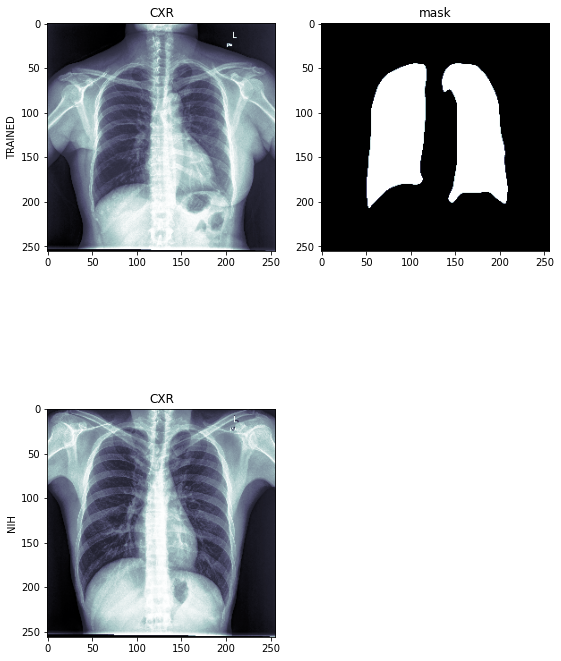

In [47]:
i = 2
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 13))
axs[0, 0].imshow(image_train[i].reshape(256,256), cmap='bone')
axs[0, 1].imshow(mask_train[i].reshape(256,256), cmap='bone')
axs[0, 0].set_ylabel('TRAINED')

# axs[1, 0].imshow(image_test[i].reshape(256,256), cmap='bone')
# axs[1, 1].imshow(mask_test[i].reshape(256,256), cmap='bone')
# axs[1, 0].set_ylabel('TESTED')

axs[1, 0].imshow(X_test[i].reshape(256,256), cmap='bone')
axs[1, 0].set_ylabel('NIH')

axs[0, 0].set_title('CXR')
axs[1, 0].set_title('CXR')
# axs[2, 0].set_title('CXR')

axs[0, 1].set_title('mask')
# axs[1, 1].set_title('mask')

fig.delaxes(axs[1, 1])

In [48]:
assert image_train.shape == mask_train.shape
assert image_test.shape == mask_test.shape
images = np.concatenate((image_train, image_test), axis=0)
masks  = np.concatenate((mask_train, mask_test), axis=0)

print('Dimensi/Ukuran dari Image: ',images.shape,'\nDimensi/Ukuran dari Label(Mask): ', masks.shape)

Dimensi/Ukuran dari Image:  (45, 256, 256, 1) 
Dimensi/Ukuran dari Label(Mask):  (45, 256, 256, 1)


# **Augmentasi Image pada Dataset**

*membuat contrast_image_v1*

In [49]:
# Pengaturan brightness
def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):
    
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow) / 255.0
        gamma_b = shadow
        
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    
    if contrast != 0:
        f = 131 * (contrast + 127) / (127 * (131 - contrast))
        alpha_c = f
        gamma_c = 127 * (1 - f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

In [50]:
# Membuat Contrast
def create_contrast_images_v1(b, c):
    contrast_images = []
    for i in tqdm(range(len(images)), "contrast_images"):
        contrast_images.append(apply_brightness_contrast(images[i], brightness=b, contrast=c))
    return contrast_images

In [51]:
b, c = -40, -120

contrast_images_v1 = create_contrast_images_v1(b, c)
contrast_images_v1 = np.array(contrast_images_v1).reshape(len(contrast_images_v1), 256, 256, 1)
print(f'\nDimensi Contrast v1 = {contrast_images_v1.shape}')

contrast_images: 100%|██████████| 45/45 [00:00<00:00, 2068.38it/s]


Dimensi Contrast v1 = (45, 256, 256, 1)


*membuat contrast_image_v2*

In [52]:
def create_contrast_images_v2(alpha, beta):
    contrast_images_v2 = []
    for i in tqdm(range(len(images)), "contrast_images"):
        contrast_images_v2.append(cv2.addWeighted(images[i], alpha, images[i], 0, beta))
    return contrast_images_v2

In [53]:
alpha = 1.5 #alpha
beta = 0.7 #beta

contrast_images_v2 = create_contrast_images_v2(alpha, beta)
contrast_images_v2 = np.array(contrast_images_v2).reshape(len(contrast_images_v2), 256, 256, 1)
print(f'\nDimensi Contrast v2 = {contrast_images_v2.shape}')

contrast_images: 100%|██████████| 45/45 [00:00<00:00, 4623.80it/s]


Dimensi Contrast v2 = (45, 256, 256, 1)


*membuat noise_image*

In [54]:
def noise(i: int = len(images)):
    return np.random.randint(0, 255, size=(i, 256, 256, 1))

def noise_images(epsilon: float = 0.1):
    noised = noise()
    noised_img = []
    for i in tqdm(range(len(images)), "noise_images"):
        noised_img.append(noised[i] * epsilon + images[i])
    
    return noised_img

noised_images = noise_images(epsilon=0.1)
noised_images = np.array(noised_images).reshape(len(noised_images), 256, 256, 1)
print(f'\nDimensi Noise = {noised_images.shape}')

noise_images: 100%|██████████| 45/45 [00:00<00:00, 2687.51it/s]


Dimensi Noise = (45, 256, 256, 1)


*Mengecek Image*

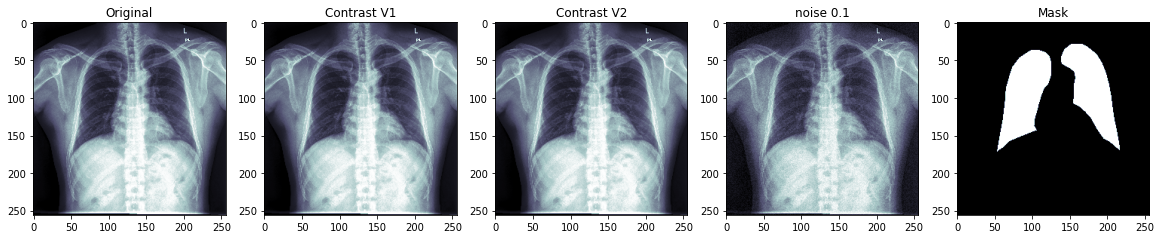

In [55]:
i = 6
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 10))

ax1.imshow(images[i].reshape(256, 256), cmap='bone')
ax1.set_title('Original')

ax2.imshow(contrast_images_v1[i].reshape(256, 256), cmap='bone')
ax2.set_title('Contrast V1')

ax3.imshow(contrast_images_v2[i].reshape(256, 256), cmap='bone')
ax3.set_title('Contrast V2')

ax4.imshow(noised_images[i].reshape(256, 256), cmap='bone')
ax4.set_title('noise 0.1')

ax5.imshow(masks[i].reshape(256, 256), cmap='bone')
ax5.set_title('Mask');

In [56]:
# Menggabungkan semua image dan semua label(mask)
all_images = np.concatenate((images, contrast_images_v1, contrast_images_v2, noised_images), axis=0)
all_masks  = np.concatenate((masks, masks, masks, masks), axis=0)

In [57]:
print('Dimensi/Ukuran dari semua Image: ',all_images.shape,'\nDimensi/Ukuran dari semua Label(Mask): ', all_masks.shape)

Dimensi/Ukuran dari semua Image:  (180, 256, 256, 1) 
Dimensi/Ukuran dari semua Label(Mask):  (180, 256, 256, 1)


In [58]:
# Ukuran Image = (256 x 256)
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split((all_images - 127.0) / 127.0, 
                                                  (all_masks > 127).astype(np.float32), 
                                                  test_size = 0.2, 
                                                  random_state = 2018)
X_testNorm = (X_test - 127.0) / 127.0

# **Menerapkan Model XNet**

In [59]:
# Inisialisasi Fungsi
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

def jaccard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

def jaccard_coef_loss(y_true, y_pred):
    return 1 - jaccard_coef(y_true, y_pred) 

In [60]:
# Code XNet dari github https://github.com/JosephPB/XNet
def XNet(input_shape=(256,256,1), classes=1, kernel_size = 3, filter_depth = (16,32,64,128,0)):
    img_input = Input(input_shape)
    
    # Encoder
    conv1 = Conv2D(filter_depth[0], (kernel_size, kernel_size), padding="same")(img_input)
    batch1 = BatchNormalization()(conv1)
    act1 = Activation("relu")(batch1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(act1)
    #100x100
    
    conv2 = Conv2D(filter_depth[1], (kernel_size, kernel_size), padding="same")(pool1)
    batch2 = BatchNormalization()(conv2)
    act2 = Activation("relu")(batch2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(act2)
    #50x50
    
    conv3 = Conv2D(filter_depth[2], (kernel_size, kernel_size), padding="same")(pool2)
    batch3 = BatchNormalization()(conv3)
    act3 = Activation("relu")(batch3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(act3)
    #25x25
    
    #Flat
    conv4 = Conv2D(filter_depth[3], (kernel_size, kernel_size), padding="same")(pool3)
    batch4 = BatchNormalization()(conv4)
    act4 = Activation("relu")(batch4)
    #25x25
    
    conv5 = Conv2D(filter_depth[3], (kernel_size, kernel_size), padding="same")(act4)
    batch5 = BatchNormalization()(conv5)
    act5 = Activation("relu")(batch5)
    #25x25
    
    #Up
    up6 = UpSampling2D(size=(2, 2))(act5)
    conv6 = Conv2D(filter_depth[2], (kernel_size, kernel_size), padding="same")(up6)
    batch6 = BatchNormalization()(conv6)
    act6 = Activation("relu")(batch6)
    concat6 = Concatenate()([act3,act6])
    #50x50
    
    up7 = UpSampling2D(size=(2, 2))(concat6)
    conv7 = Conv2D(filter_depth[1], (kernel_size, kernel_size), padding="same")(up7)
    batch7 = BatchNormalization()(conv7)
    act7 = Activation("relu")(batch7)
    concat7 = Concatenate()([act2,act7])
    #100x100
    
    #Down
    conv8 = Conv2D(filter_depth[1], (kernel_size, kernel_size), padding="same")(concat7)
    batch8 = BatchNormalization()(conv8)
    act8 = Activation("relu")(batch8)
    pool8 = MaxPooling2D(pool_size=(2, 2))(act8)
    #50x50
    
    conv9 = Conv2D(filter_depth[2], (kernel_size, kernel_size), padding="same")(pool8)
    batch9 = BatchNormalization()(conv9)
    act9 = Activation("relu")(batch9)
    pool9 = MaxPooling2D(pool_size=(2, 2))(act9)
    
    #25x25
    
    #Flat
    conv10 = Conv2D(filter_depth[3], (kernel_size, kernel_size), padding="same")(pool9)
    batch10 = BatchNormalization()(conv10)
    act10 = Activation("relu")(batch10)
    #25x25
    
    conv11 = Conv2D(filter_depth[3], (kernel_size, kernel_size), padding="same")(act10)
    batch11 = BatchNormalization()(conv11)
    act11 = Activation("relu")(batch11)
    #25x25
    
    #Encoder
    up12 = UpSampling2D(size=(2, 2))(act11)
    conv12 = Conv2D(filter_depth[2], (kernel_size, kernel_size), padding="same")(up12)
    batch12 = BatchNormalization()(conv12)
    act12 = Activation("relu")(batch12)
    concat12 = Concatenate()([act9,act12])
    #50x50
    
    up13 = UpSampling2D(size=(2, 2))(concat12)
    conv13 = Conv2D(filter_depth[1], (kernel_size, kernel_size), padding="same")(up13)
    batch13 = BatchNormalization()(conv13)
    act13 =  Activation("relu")(batch13)
    concat13 = Concatenate()([act8,act13])
    #100x100
    
    up14 = UpSampling2D(size=(2, 2))(concat13)
    conv14 = Conv2D(filter_depth[0], (kernel_size, kernel_size), padding="same")(up14)
    batch14 = BatchNormalization()(conv14)
    act14 = Activation("relu")(batch14)
    concat14 = Concatenate()([act1,act14])
    #200x200
    
    conv15 = Conv2D(1, (1, 1), activation='sigmoid')(concat14)

    return Model(inputs=[img_input], outputs=[conv15])

In [61]:
# Inisialisasi XNet sebagai model yang akan digunakan
model = XNet(input_shape=(dim, dim, 1))

In [62]:
# Ringkasan Model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [63]:
weight_path="{}_weights.best.hdf5".format('cxr_reg')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5, 
                                   patience=4, 
                                   verbose=1, mode='min', epsilon=0.0001, cooldown=2, min_lr=1e-6)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=35) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [64]:
metrics = [dice_coef, jaccard_coef,
           'binary_accuracy', 
           tf.keras.metrics.Precision(), 
           tf.keras.metrics.Recall()]

loss = [dice_coef_loss, 
        jaccard_coef_loss,
        'binary_crossentropy']

In [65]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(lr = 1e-4), 
              loss = loss, 
              metrics = metrics)

In [66]:
res = model.fit(X_train, Y_train, 
                validation_data=(X_val, Y_val), 
                batch_size=32, epochs=100,
                callbacks=callbacks_list)

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 0.6589 - dice_coef: 0.3460 - jaccard_coef: 0.2095 - binary_accuracy: 0.5330 - precision: 0.2775 - recall: 0.6316
Epoch 1: val_loss improved from inf to 0.68377, saving model to cxr_reg_weights.best.hdf5
5/5 [==============================] - 13s 1s/step - loss: 0.6589 - dice_coef: 0.3460 - jaccard_coef: 0.2095 - binary_accuracy: 0.5330 - precision: 0.2775 - recall: 0.6316 - val_loss: 0.6838 - val_dice_coef: 0.3271 - val_jaccard_coef: 0.1956 - val_binary_accuracy: 0.6031 - val_precision: 0.2647 - val_recall: 0.4050 - lr: 1.0000e-04
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 0.5732 - dice_coef: 0.4283 - jaccard_coef: 0.2726 - binary_accuracy: 0.6603 - precision: 0.3959 - recall: 0.8822
Epoch 2: val_loss improved from 0.68377 to 0.68212, saving model to cxr_reg_weights.best.hdf5
5/5 [==============================] - 2s 347ms/step - loss: 0.5732 - dice_coef: 0.4283 - jaccard_coef: 0.2726 - binary_ac

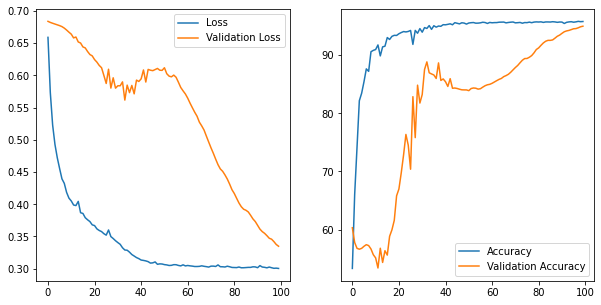

In [67]:
# Melihat grafik hubungan loss, validation loss dan accuracy, validation accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(res.history['loss'], '-', label = 'Loss')
ax1.plot(res.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100 * np.array(res.history['binary_accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100 * np.array(res.history['val_binary_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend();

# **Melakukan Prediksi setelah Train Dataset**

*Prediksi dengan menggunakan sampel dari beberapa dataset Train yang sudah divalidasi*

In [68]:
preds_val = model.predict(X_val)

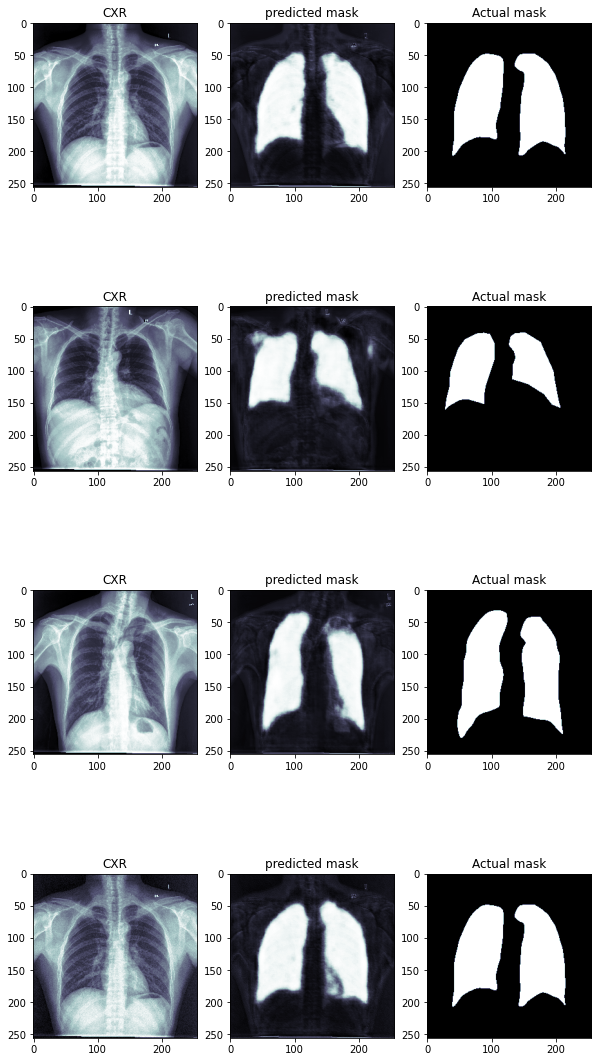

In [69]:
# Prediksi dari 4 gambar menggunakan Dataset Train yang sudah di validasi
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10, 20))

for i in range(4):
    for j in range(3):
        if j == 0:
            axs[i, j].imshow(X_val[i + 9].reshape(256, 256), cmap='bone')
            axs[i, j].set_title('CXR')
        elif j == 1:
            axs[i, j].imshow(preds_val[i + 9].reshape(256, 256), cmap='bone')
            axs[i, j].set_title('predicted mask')
       
        elif j == 2:
            axs[i, j].imshow(Y_val[i + 9].reshape(256, 256), cmap='bone')
            axs[i, j].set_title('Actual mask')

*Prediksi dengan menggunakan sampel dari beberapa dataset Test*

In [70]:
preds = model.predict(X_testNorm)

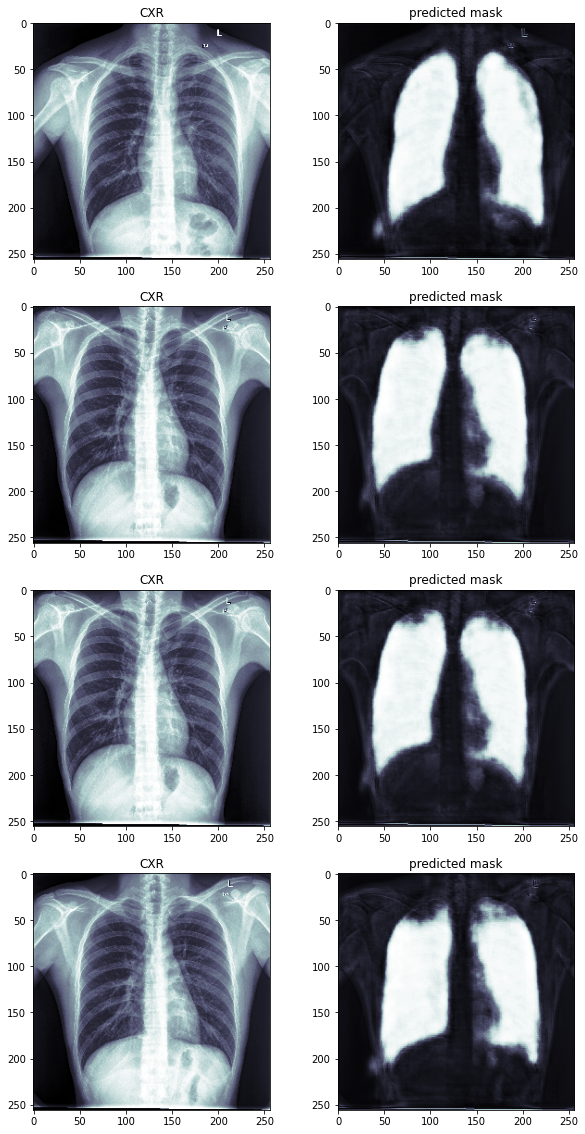

In [71]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))

for i in range(4):
    for j in range(2):
        if j != 1:
            axs[i, j].imshow(X_testNorm[i + 1].reshape(256, 256), cmap='bone')
            axs[i, j].set_title('CXR')
        else:
            axs[i, j].imshow(preds[i + 1].reshape(256, 256), cmap='bone')
            axs[i, j].set_title('predicted mask')

# **Kesimpulan Prediksi dengan Model XNet dengan small dataset**

*Terlihat pada bagian "Prediksi dengan menggunakan sampel dari beberapa dataset Train yang sudah divalidasi" gambar prediksi sudah mendekati gambar mask yang seharusnya, artinya jika dataset dibuat lebih besar, diharapkan gambar hasil prediksi bisa hampir sama dengan gambar mask seharusnya*

*Sebagai perbandingan maka akan dilakukan di project UTS di versi ke 2 pada github: https://github.com/thyeaditungson29/mystudy_ADL2022/blob/main/UTS_ADL_Thyeadi_Tungson_(2nd_version).ipynb*

Perbandingan data pada 1st version UTS dengan 2nd version UTS

**1st Version**
* Total file pada image_path_train: 50
* Total file pada mask_path_train: 45
* Total file pada image_path_test: 10


**2nd version**
* Total file pada image_path_train: 800
* Total file pada mask_path_train: 704
* Total file pada image_path_test: 96